## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 9.13: SED for a flat disk compared to photometry of AA Tau

#### the AA Tau data are from https://ui.adsabs.harvard.edu/abs/2013ApJ...771..129A and provided as an ascii file by Sean Andrews

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as c
%matplotlib inline

In [5]:
# blackbody
def Bnu(nu,T):
    return(2*c.h*nu**3 / c.c**2 * (np.exp(c.h*nu/(c.k_B*T)) - 1)**-1)

In [6]:
def integrate_disk(nu, r, T, Sigma, incl):
    cosi = np.cos(incl * np.pi/180)
    Fnu = np.zeros(nu.size) * Bnu(1*u.Hz,1*u.K)
    for i in range(r.size-1):
        r0 = r[i]
        dr = r[i+1] - r0
        kappa_nu = 10 * (nu.value/1e12)     # Beckwith dust opacity (cm2/g)
        tau_nu = kappa_nu * Sigma[i] / cosi
        Fnu += Bnu(nu, T[i]) * (1 - np.exp(-tau_nu))* 2 * np.pi * r0 * cosi * dr
    return Fnu

In [7]:
def plotsed_nuFnu(wl, Fnu_star, Fnu_disk):
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(111)

    ax.set_xlim(2e-1, 5e3)
    ax.set_ylim(5e-18, 2e-12)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=14)
    ax.set_ylabel(r'$\nu F_\nu$ (W m$^{-2}$)', fontsize=14)

    # model
    nu = 3e-12/wl
    ax.plot(wl, nu*Fnu_star, color='black', lw=1, ls='--', label='Star')
    ax.plot(wl, nu*Fnu_disk, color='black', lw=1, ls=':', label='Disk')
    ax.plot(wl, nu*Fnu_star+nu*Fnu_disk, color='black', lw=2, ls='-', label='Star+Disk')

    # AA Tau data
    wl_obs, Fnu_obs, sigsys, cal, ref = np.genfromtxt('AATau_photometry.txt', unpack=True)
    nu_obs = 3e-12 / wl_obs
    Fnu_sigma = np.sqrt(sigsys**2 + (cal*Fnu_obs)**2)
    ax.plot(wl_obs, nu_obs*Fnu_obs, 'ko', label='Observations')
    #ax.errorbar(wl_obs, nu_obs*Fnu_obs, yerr=nu_obs*Fnu_sigma, fmt='o', ecolor='black', elinewidth=0.5, mfc='black', ms=5, mec='None')

    ax.legend()

    x_labels = ['1','10','100','1000']
    x_loc = np.array([float(x) for x in x_labels])
    ax.set_xticks(x_loc)
    ax.set_xticklabels(x_labels)
    #y_labels = ['1','10','100','1000']
    #y_loc = np.array([float(y) for y in y_labels])
    #ax.set_yticks(y_loc)
    #ax.set_yticklabels(y_labels)

    fig.tight_layout(rect=[0.0,0.0,1.0,1.0]) 
    plt.savefig('disk_SED.pdf')

/anaconda/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


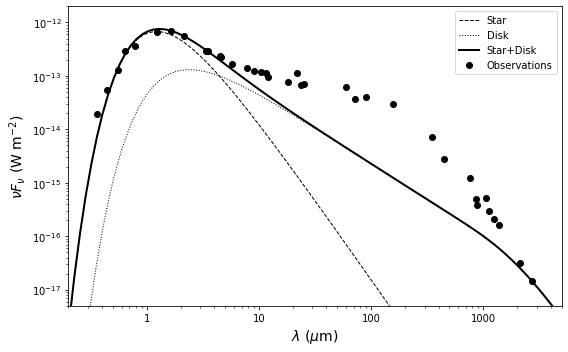

In [8]:
# the disk parameters here are not intended as a fit to AA Tau!

Rmin = 0.01  # au
Rmax = 100   # au
r = np.logspace(np.log10(Rmin),np.log10(Rmax),1000)
d = 145      # pc (Loomis et al.)

wl = np.logspace(-1,4,100)  # microns
nu = 3e14 / wl *u.Hz

Jy = 1e-26 * u.W * (u.m)**(-2) * (u.Hz)**(-1)
d_au = d * 2.06e5

Rsun_pc = 6.5e-8
Tstar = 3000 * u.K
Fnu_star = (Bnu(nu, Tstar) / Jy).decompose() * np.pi*(Rsun_pc/d)**2

T1 = 80 * u.K
T = T1 / r**0.75
Sigma1 = 100                 # g/cm2 (because of kappa and tradition...)
Sigma = Sigma1 / r
incl = 60
Fnu_disk = (integrate_disk(nu, r, T, Sigma, incl) / Jy).decompose() / d_au**2

plotsed_nuFnu(wl, Fnu_star, Fnu_disk)